In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using xkcd plot styles

In [3]:
plt.xkcd()

Loading data in pandas. Note this data has been cleaned to only contain relevant columns for the plots

In [4]:
df = pd.read_csv('NL-RSE_survey_december-6-2022_scrubbed.csv', sep=';')

# Number of participants
print('# Number of participants', len(df))
len(df)

# Number of participants 24


24

In [5]:
# 

agreement_order = [
  "Strongly disagree",
  "Somewhat disagree",
  "Neither agree nor disagree",
  "Somewhat agree",
  "Strongly agree" 
]

frequency_order = [
  "Never",
  "Rarely",
  "Sometimes",
  "Often",
  "Always"
]

Generating plots and saving results

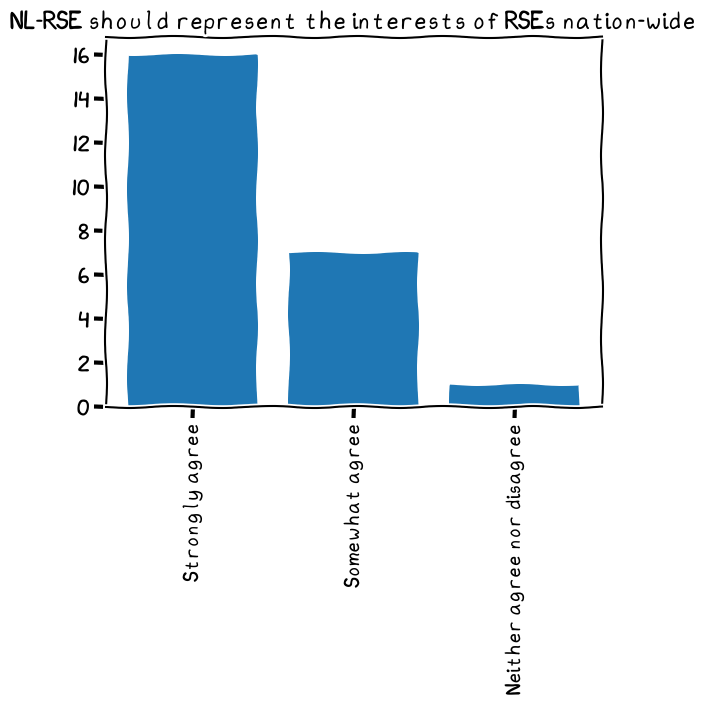

In [6]:
counts = df['nlrse_nationwide'].value_counts()
plt.bar(counts.keys(), counts.values)
plt.xticks(rotation = 90)
plt.title('NL-RSE should represent the interests of RSEs nation-wide')
plt.savefig('nlrse_nationwide.jpg')

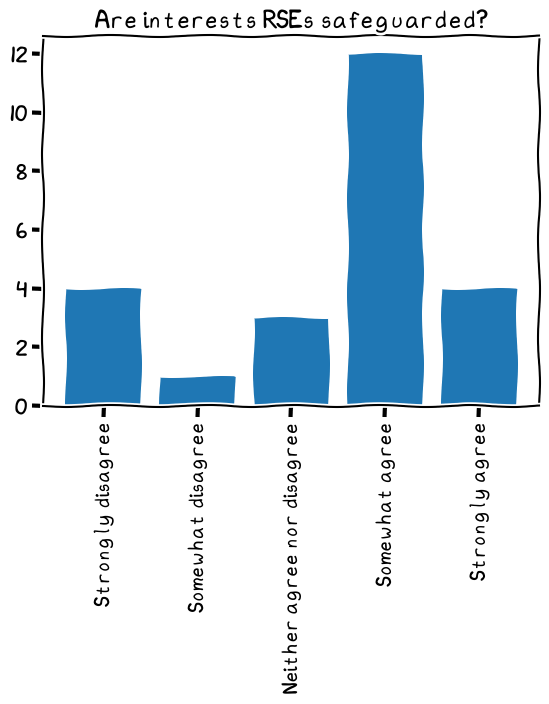

In [7]:
counts = df['rse_safeguarded_scal'].value_counts()[agreement_order]
plt.bar(counts.keys(), counts.values)
plt.xticks(rotation = 90)
plt.title('Are interests RSEs safeguarded?')
plt.savefig('rse_safeguarded_scal.jpg')

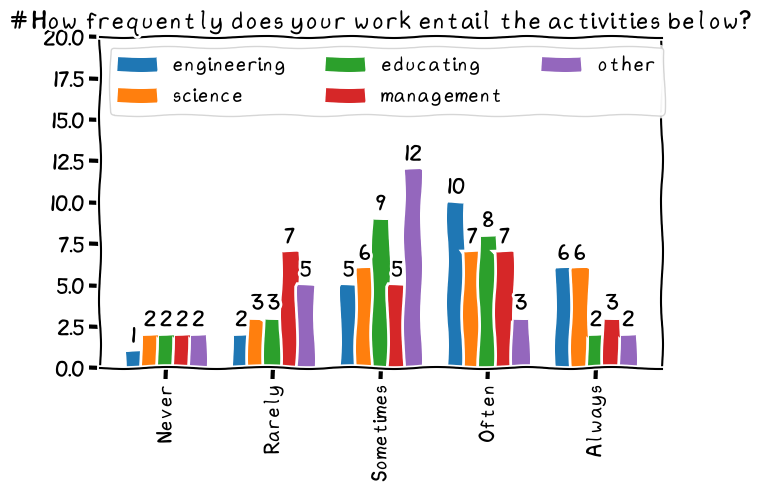

In [8]:
activities = {
    "engineering": "rse_activities_1",
    "science": "rse_activities_2",
    "educating": "rse_activities_3", 
    "management": "rse_activities_4",
    "other": "rse_activities_5"
}


x = np.arange(len(activities))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for activity, col in activities.items():
    offset = (width * multiplier) - width
    counts = df[col].value_counts()[frequency_order]
    rects = plt.bar(x + offset, counts.values, width, label=activity)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# "engineering", "science", "educating", "management", "other"


plt.xticks(rotation = 90)
ax.set_xticks(x + width, frequency_order)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20)
plt.title('# How frequently does your work entail the activities below?')
plt.savefig('rse_activities_v1.jpg')

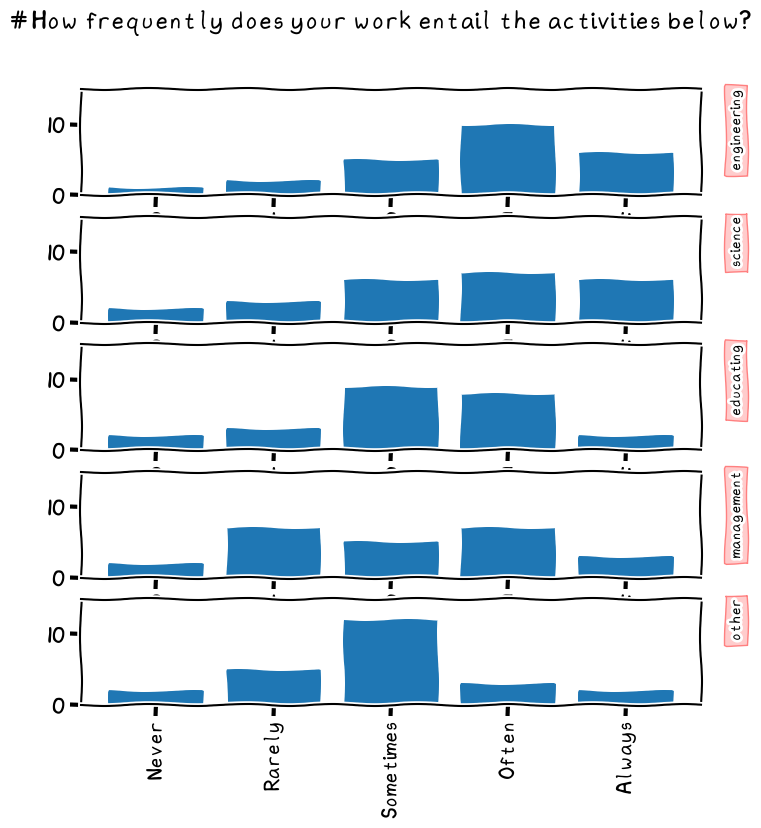

In [9]:

activities = [
    "engineering",
    "science",
    "educating", 
    "management",
    "other"
]

fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i, activity in enumerate(activities):
    col = 'rse_activities_{}'.format(i+1)
    counts = df[col].value_counts()[frequency_order]
    rects = axs[i].bar(x, counts.values, label=activity)
    axs[i].set_ylim(0, 15)
    
    axs[i].text(5, 15, activity, size=10, rotation=90,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.xticks(rotation = 90)
axs[4].set_xticks(x, frequency_order)
fig.suptitle('# How frequently does your work entail the activities below?')
plt.savefig('rse_activities_v2.jpg')